In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
file='weatherorg.csv'
data = pd.read_csv(file)

In [3]:
X = data[['Rainfall','Evaporation','Sunshine','WindGustSpeed','WindGustDirSine','WindGustDirCose','WindSpeed9am','WindDir9amSine','WindDir9amCose','WindSpeed3pm','WindDir3pmSine','WindDir3pmCose','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM','RainToday','RainTomorrow']]
y_min_temp = data['MinTemp'].values
y_max_temp = data['MaxTemp'].values
X_train, X_test, y_train_min_temp, y_test_min_temp, y_train_max_temp, y_test_max_temp = train_test_split(X, y_min_temp, y_max_temp, test_size=0.2, random_state=42)


In [4]:
linear_reg_min_temp = LinearRegression()
linear_reg_max_temp = LinearRegression()

In [5]:
linear_reg_min_temp.fit(X_train, y_train_min_temp)
linear_reg_max_temp.fit(X_train, y_train_max_temp)

LinearRegression()

In [6]:
y_pred_min_temp = linear_reg_min_temp.predict(X_test)
y_pred_max_temp = linear_reg_max_temp.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Calculate Mean Absolute Error (MAE) for MinTemp
mae_min_temp = mean_absolute_error(y_test_min_temp, y_pred_min_temp)
print(f'MAE for MinTemp: {mae_min_temp}')

# Calculate Mean Absolute Error (MAE) for MaxTemp
mae_max_temp = mean_absolute_error(y_test_max_temp, y_pred_max_temp)
print(f'MAE for MaxTemp: {mae_max_temp}')

# Calculate Mean Error (ME) for MinTemp
me_min_temp = np.mean(y_pred_min_temp - y_test_min_temp)
print(f'ME for MinTemp: {me_min_temp}')

# Calculate Mean Error (ME) for MaxTemp
me_max_temp = np.mean(y_pred_max_temp - y_test_max_temp)
print(f'ME for MaxTemp: {me_max_temp}')

# Calculate Average Error (AE) for MinTemp
ae_min_temp = np.mean(np.abs(y_pred_min_temp - y_test_min_temp))
print(f'AE for MinTemp: {ae_min_temp}')

# Calculate Average Error (AE) for MaxTemp
ae_max_temp = np.mean(np.abs(y_pred_max_temp - y_test_max_temp))
print(f'AE for MaxTemp: {ae_max_temp}')

# Calculate Root Mean Squared Error (RMSE) for MinTemp
rmse_min_temp = np.sqrt(mean_squared_error(y_test_min_temp, y_pred_min_temp))
print(f'RMSE for MinTemp: {rmse_min_temp}')

# Calculate Root Mean Squared Error (RMSE) for MaxTemp
rmse_max_temp = np.sqrt(mean_squared_error(y_test_max_temp, y_pred_max_temp))
print(f'RMSE for MaxTemp: {rmse_max_temp}')

# Calculate Correlation Coefficient for MinTemp
correlation_min_temp = np.corrcoef(y_test_min_temp, y_pred_min_temp, rowvar=False)[0, 1]
print(f'Correlation Coefficient for MinTemp: {correlation_min_temp}')

# Calculate Correlation Coefficient for MaxTemp
correlation_max_temp = np.corrcoef(y_test_max_temp, y_pred_max_temp, rowvar=False)[0, 1]
print(f'Correlation Coefficient for MaxTemp: {correlation_max_temp}')


MAE for MinTemp: 1.3702574422094256
MAE for MaxTemp: 0.595353180362552
ME for MinTemp: -0.2564691289537292
ME for MaxTemp: -0.16978343462091422
AE for MinTemp: 1.3702574422094256
AE for MaxTemp: 0.595353180362552
RMSE for MinTemp: 1.7113813079821854
RMSE for MaxTemp: 1.1361661557358558
Correlation Coefficient for MinTemp: 0.9601197069742932
Correlation Coefficient for MaxTemp: 0.9849801243164391


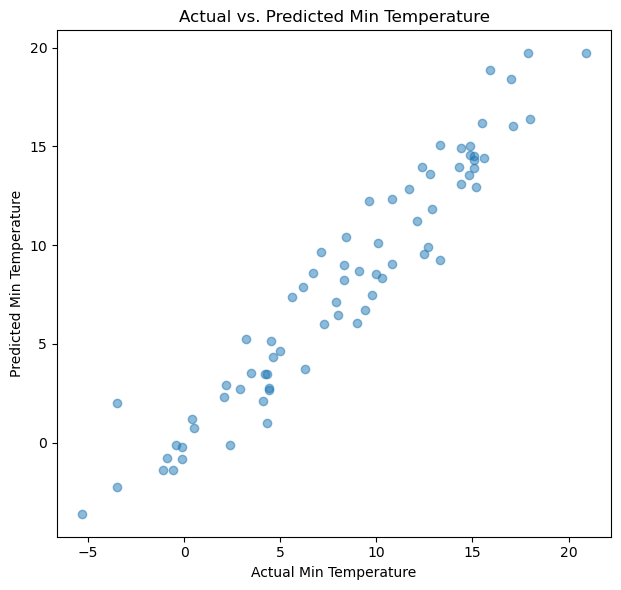

In [8]:
import matplotlib.pyplot as plt

# Create scatter plots for minimum temperature predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_min_temp,y_pred_min_temp, alpha=0.5)
plt.xlabel('Actual Min Temperature')
plt.ylabel('Predicted Min Temperature')
plt.title('Actual vs. Predicted Min Temperature')
plt.tight_layout()
plt.show()




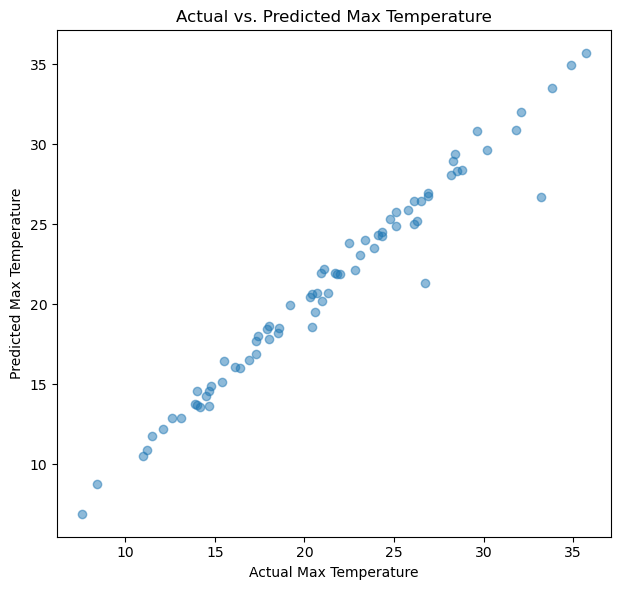

In [9]:
# Create scatter plots for maximum temperature predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test_max_temp,y_pred_max_temp, alpha=0.5)
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.title('Actual vs. Predicted Max Temperature')

plt.tight_layout()
plt.show()

In [10]:
l=y_test_max_temp
print(l)

[19.2 26.5 32.1 16.1 28.3 17.3 33.2 17.3 21.8 31.8 21.3 24.8 14.8 26.3
 30.2 14.7 24.3 11.5 20.6 23.1 22.8 18.  35.7  8.4 14.  18.6 14.5 13.1
 21.  28.4 26.9 24.1 20.3 28.5 17.9 25.1 23.4 18.5 26.1 24.3 15.4 23.9
 20.4 14.2 25.8 14.  34.9 26.7 16.9 21.1 13.9 22.   7.6 11.  20.9 20.7
 28.8 15.5 26.1 25.1 12.6 26.9 20.4 21.7 11.2 33.8 16.4 28.2 14.7 22.5
 29.6 17.4 12.1 18. ]


In [11]:
import numpy as np

# Define a threshold for considering predictions as correct
threshold = 1.0  # Adjust this based on your problem's characteristics

# Calculate the absolute errors
errors = np.abs(y_test_max_temp - y_pred_max_temp)

# Count the number of correct predictions based on the threshold
correct_predictions = np.sum(errors <= threshold)

# Calculate accuracy as a percentage
accuracy_percentage = (correct_predictions/ len(y_test_max_temp)) * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')


Accuracy: 83.78%


In [12]:
import numpy as np

# Define a threshold for considering predictions as correct
threshold = 1.0  # Adjust this based on your problem's characteristics

# Calculate the absolute errors
errors = np.abs(y_test_min_temp - y_pred_min_temp)

# Count the number of correct predictions based on the threshold
correct_predictions = np.sum(errors <= threshold)

# Calculate accuracy as a percentage
accuracy_percentage = (correct_predictions/ len(y_test_min_temp)) * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')


Accuracy: 41.89%


In [13]:

import seaborn as sns
import matplotlib.pyplot as plt


# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Set the threshold for considering features with high correlation
threshold = 0.3

# Identify features with high correlation for predicting minimum temperature
min_temp_correlation = correlation_matrix['MinTemp']
high_corr_min_temp = min_temp_correlation[(min_temp_correlation > threshold) | (min_temp_correlation < -threshold)]
print("\nHighly Correlated Features for Minimum Temperature:")
print(high_corr_min_temp)

# Identify features with high correlation for predicting maximum temperature
max_temp_correlation = correlation_matrix['MaxTemp']
high_corr_max_temp = max_temp_correlation[(max_temp_correlation > threshold) | (max_temp_correlation < -threshold)]
print("\nHighly Correlated Features for Maximum Temperature:")
print(high_corr_max_temp)


Dataset Preview:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0      8.0     24.3       0.0          3.4       6.3           68   
1     14.0     26.9       3.6          4.4       9.7           80   
2     13.7     23.4       3.6          5.8       3.3           82   
3     13.3     15.5      39.8          7.2       9.1           62   
4      7.6     16.1       2.8          5.6      10.6           68   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  ...  WindDir9amSine  \
0           29       1019.7       1015.0         7  ...   -9.238795e-01   
1           36       1012.4       1008.4         5  ...    9.238795e-01   
2           69       1009.5       1007.2         8  ...    3.826834e-01   
3           56       1005.5       1007.0         2  ...   -7.071068e-01   
4           49       1018.3       1018.5         7  ...    1.225150e-16   

   WindDir9amCose  WindSpeed9am  WindDir3pm Angle.2  WindDir3pmSine  \
0       -0.382683           6.0          NW   

ValueError: could not convert string to float: 'NW'